### Floquet eigen values and states from Mean field Hamiltonian

For a single frequency

In [ ]:
import numpy as np
from odeintw import odeintw
from numpy.linalg import multi_dot, norm, eig
from scipy.signal import find_peaks
from scipy.special import j0
import matplotlib.pyplot as plt

h = 25.0
h0 = 0.1
w = 41.6
T = 2 * np.pi/w
steps = 1000
t = np.linspace(0, T, steps)

psi0 = np.array([1+0.j, 0+0.j])
psi1 = np.array([0+0.j, 1+0.j])

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

def mf_jac (psi, t, h0, h, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx_mf * sx + drive * sz)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

sol_mf0 = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
sol_mf1 = odeintw(mf_func, psi1, t, args=(h0, h, w), Dfun=mf_jac)

u = sol_mf0[steps-1]
v = sol_mf1[steps-1]
floq_mat = np.array([u,v])
evals, evecs = eig(floq_mat)

print("\nafter one time period--")
print("\n floquet matrix is\n",floq_mat)
print("\n eigen values are \n",evals[0],evals[1])
print("\n eigen vectors are \n",evecs[0],evecs[1])

mz_mf0 = np.einsum("ij,jk,ik->i", sol_mf0.conjugate(), sz, sol_mf0)
mz_mf1 = np.einsum("ij,jk,ik->i", sol_mf1.conjugate(), sz, sol_mf1)

print("\n sz with after one time cycle when inital state is (1 0)\n", mz_mf0[steps-1])
print("\n sz with after one time cycle when inital state is (0 1)\n\n", mz_mf1[steps-1])
plt.plot(t,mz_mf0.real,label="1 0")
plt.plot(t,mz_mf1.real,label="0 1")
plt.legend()
plt.xlabel('time')
plt.ylabel('sz')
plt.ylim(-1.1,1.1)
plt.show()

### Floquet eigen values and states from Mean field Hamiltonian with frequency spectrum

A few number of frequencies

run starts with amplitude 75.0


<ipython-input-2-8876649e787f>:52: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc0[i] = (1j)* np.log(evals[0])/T
<ipython-input-2-8876649e787f>:53: ComplexWarning: Casting complex values to real discards the imaginary part
  phasefunc1[i] = (1j)* np.log(evals[1])/T


time taken 0.00449208418528239 minutes


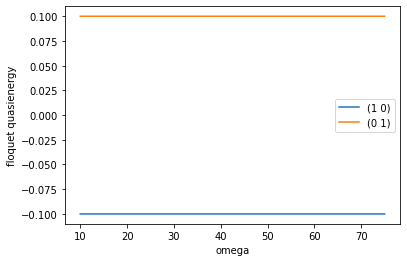

In [2]:
import numpy as np
from odeintw import odeintw
from numpy.linalg import multi_dot, norm, eig
from scipy.signal import find_peaks
from scipy.special import j0
import matplotlib.pyplot as plt
import time
import cmath

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

def mf_jac (psi, t, h0, h, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx_mf * sx + drive * sz)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

h = 75.0
h0 = 0.1
steps = 1000
psi0 = np.array([1+0.j, 0+0.j])
psi1 = np.array([0+0.j, 1+0.j])
omegas = np.linspace(10.0,75.0,5)

eigval0,eigvec0,eigval1,eigvec1 = [],[],[],[]
phasefunc0,phasefunc1 = np.zeros(len(omegas)), np.zeros(len(omegas))
start = time.time()
print("run starts with amplitude",h)

for i,w in enumerate(omegas):
    T = 2 * np.pi/w  
    t = np.linspace(0, T, steps)

    sol_mf0 = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
    sol_mf1 = odeintw(mf_func, psi1, t, args=(h0, h, w), Dfun=mf_jac)

    u = sol_mf0[steps-1]
    v = sol_mf1[steps-1]
    floq_mat = np.array([u,v])
    evals, evecs = eig(floq_mat)
    
    eigval0.append(evals[0])
    eigvec0.append(evecs[0])
    eigval1.append(evals[1])    
    eigvec1.append(evecs[1])

    phasefunc0[i] = (1j)* np.log(evals[0])/T
    phasefunc1[i] = (1j)* np.log(evals[1])/T

print("time taken",(time.time()-start)/60.0,"minutes")    

plt.plot(omegas,phasefunc0.real, label = "(1 0)")
plt.plot(omegas,phasefunc1.real, label = "(0 1)")
plt.legend()
plt.xlabel('omega')
plt.ylabel('floquet quasienergy')
plt.show()

# Floquet dynamics in "real" space



We introduce the position-momentum conjugate and effective Planck constant $1/N$ the Schroedinger equation becomes-
$$\frac{i}{N}  \frac{\partial}{\partial t}\psi_t(q) = \mathcal{H}\psi_t(q)$$
Where hamiltonian 
$$\mathcal{H} = -2q^2 -h(t)\sqrt{(1-4q^2)}cos(p)$$
Now we want to find one cycle evolution for Floquet matrix.
The initial condition for wave function is a unitary matrix of which each column is the nth state's initial condition. This means we have to descretize the position as well as momentum space with descrete Hamiltonian.
<br> The position space spans as-
$$
q = (q_0, q_1,q_2,....,q_{-1})
$$
And momentum is related with position as-
$$
p = \frac{i}{N}\frac{\partial}{\partial q}
$$
So we can write-
$$ \mathcal{H} {|\psi\rangle} = \frac{i}{N}\frac{\partial{|\psi\rangle}}{\partial t}$$
Here the wavefunction-
$$
|\psi \rangle = \left(\begin{array}(
|\psi_0 \rangle\\
|\psi_1 \rangle\\
|\psi_2 \rangle\\
..\\
..\\
|\psi_{N-1} \rangle
\end{array}\right)
$$

Now we can write momentum in descerte space with finite difference method as- 
$$
p^n |\psi\rangle = \frac{i^n}{N^n}\frac{\partial ^n}{\partial q ^n}|\psi\rangle \Longrightarrow^{discrete} \sum_{j=0}^{n} (-1)^j C^{n}_{j} |\psi\rangle_{k+(\frac{n}{2}-j)} = \left(p^n |\psi\rangle \right)_k
$$

<br> McLaurent series for cos(p)-
$$
\left(cos(p) |\psi\rangle \right)_k = \sum_{l=0}^{N} \frac{(-1)^l p^{2l}}{2l!} = \sum_{l=0}^{N} \sum_{j=0}^{l} \frac{(-1)^{(l+j)}}{2l!} C^{l}_{j} |\psi\rangle_{k +(l-j)}
$$

<br> Here j,k,l are integers only.
Now,
$$
\left(\mathcal{H}|\psi\rangle \right)_k = \widetilde{H}_{km} \psi_m
$$
here $C^{n}_{j}$ is for binomial combination.

References:
[1] Check T. Mori's paper equation (12)

## Multiprocs code 

running for N =  4 with 2 processors
time taken 1.423513412475586 sec


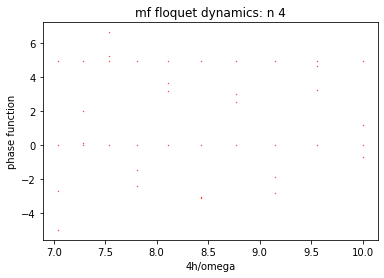

Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 356, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python

In [2]:
import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
import math
import time

start = time.time()

cosp_init = 0.0    
N = 4
h = 25.0
h0 = 0.1
    
q = np.linspace(-0.5, 0.5, N)
omegas = np.linspace(10.0,14.2,10)
psi = np.eye(N) + (1j) * np.zeros((N,N))

cosp = np.zeros((N,N)) + (1j) * np.zeros((N,N))
cosp_init = np.zeros((N,N)) + (1j) * np.zeros((N,N))
floqEvoluion_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))

title = "mf floquet dynamics: n " + str(N)
photoname = "n_" + str(N) + "_mfd_bessel3b.jpeg"
filename = "n_" + str(N) + "_mfd.txt"

class Periodic_Lattice(np.ndarray):
    def __new__(cls, input_array, lattice_spacing=None):
        obj = np.asarray(input_array).view(cls)
        obj.lattice_shape = input_array.shape
        obj.lattice_dim = len(input_array.shape)
        obj.lattice_spacing = lattice_spacing
        return obj
    
    def __getitem__(self, index):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__getitem__(index)
    
    def __setitem__(self, index, item):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__setitem__(index, item)
    
    def __array_finalize__(self, obj):
        if obj is None: return
        self.lattice_shape = getattr(obj, 'lattice_shape', obj.shape)
        self.lattice_dim = getattr(obj, 'lattice_dim', len(obj.shape))
        self.lattice_spacing = getattr(obj, 'lattice_spacing', None)
        pass
    
    def latticeWrapIdx(self, index):
        if not hasattr(index, '__iter__'): return index         # handle integer slices
        if len(index) != len(self.lattice_shape): return index  # must reference a scalar
        if any(type(i) == slice for i in index): return index   # slices not supported
        if len(index) == len(self.lattice_shape):               # periodic indexing of scalars
            mod_index = tuple(( (i%s + s)%s for i,s in zip(index, self.lattice_shape)))
            return mod_index
        raise ValueError('Unexpected index: {}'.format(index))


def floq_jac(periodic_psi,t, h, h0, w, cosp):
    drive = h0 + h * np.cos(w * t)
    jac = (1j) * N * (-2.0 * q * q - drive * np.sqrt(1.0 - 4.0 * q *q) * cosp)
    return jac

def floq_func(periodic_psi,t,h,h0,w,cosp):
    return np.dot(floq_jac(periodic_psi,t, h0, h, w, cosp), periodic_psi)

def floq_evolv(periodic_psi,h,h0,w,cosp):
    T = 2 * np.pi/w     # time periode
    t = np.linspace(0,2 * np.pi/w,N)      # time range
    floqEvoluion_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))
    
    for mm in np.arange(N):
        psi0 = periodic_psi[mm]       
        psi_t = odeintw(floq_func,psi0,t,args=(h,h0,w,cosp), Dfun=floq_jac)
        floqEvoluion_mat[mm] = psi_t[N-1]
    
    evals, evecs = eig(floqEvoluion_mat)
    phasefunc = (1j * np.log(evals))/T
    return phasefunc
    
if __name__ == '__main__':
    nprocs = 2
    p = Pool(processes = nprocs)  
    print("running for N = ", N, "with",nprocs,"processors")
    periodic_psi  = Periodic_Lattice(psi)       
    cospinit = 0.0
    
    for k in np.arange(N):
        for m in np.arange(N):
            for l in np.arange(N+1):
                for j in np.arange(l+1):
                    cospinit = cospinit + np.array([pow((-1),(l+j))/math.factorial(2 * l)* \
                                          math.comb(l,j)* periodic_psi[(k+(l-j),(m))]])
            cosp[k,m] = cospinit
            cospinit = 0.0
            
    data = p.starmap(floq_evolv,[(periodic_psi,h,h0,w,cosp) for w in omegas])
    
    print("time taken",time.time()-start,"sec")
    
    for xx, omg in enumerate(omegas):
        #omega = [omg] * N
        omega = [4*h/omg] * N
        plt.scatter(omega,data[xx].real, color='red', marker='.', s= 0.5)
    plt.title(title)    
    plt.xlabel("4h/omega")
    plt.ylabel("phase function")
    #plt.savefig(photoname, dpi=500)
    plt.show()

### Single processor single frequancy

In [4]:
## experiments

import numpy as np
from scipy.integrate import odeint
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
import math
import time
import cmath
from numpy.linalg import multi_dot, norm, eig



class Periodic_Lattice(np.ndarray):
    """Creates an n-dimensional ring that joins on boundaries w/ numpy
    
    Required Inputs
        array :: np.array :: n-dim numpy array to use wrap with
    
    Only currently supports single point selections wrapped around the boundary
    """
    def __new__(cls, input_array, lattice_spacing=None):
        """__new__ is called by numpy when and explicit constructor is used:
        obj = MySubClass(params) otherwise we must rely on __array_finalize
         """
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        
        # add the new attribute to the created instance
        obj.lattice_shape = input_array.shape
        obj.lattice_dim = len(input_array.shape)
        obj.lattice_spacing = lattice_spacing
        
        # Finally, we must return the newly created object:
        return obj
    
    def __getitem__(self, index):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__getitem__(index)
    
    def __setitem__(self, index, item):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__setitem__(index, item)
    
    def __array_finalize__(self, obj):
        """ ndarray.__new__ passes __array_finalize__ the new object, 
        of our own class (self) as well as the object from which the view has been taken (obj). 
        See
        http://docs.scipy.org/doc/numpy/user/basics.subclassing.html#simple-example-adding-an-extra-attribute-to-ndarray
        for more info
        """
        # ``self`` is a new object resulting from
        # ndarray.__new__(Periodic_Lattice, ...), therefore it only has
        # attributes that the ndarray.__new__ constructor gave it -
        # i.e. those of a standard ndarray.
        #
        # We could have got to the ndarray.__new__ call in 3 ways:
        # From an explicit constructor - e.g. Periodic_Lattice():
        #   1. obj is None
        #       (we're in the middle of the Periodic_Lattice.__new__
        #       constructor, and self.info will be set when we return to
        #       Periodic_Lattice.__new__)
        if obj is None: return
        #   2. From view casting - e.g arr.view(Periodic_Lattice):
        #       obj is arr
        #       (type(obj) can be Periodic_Lattice)
        #   3. From new-from-template - e.g lattice[:3]
        #       type(obj) is Periodic_Lattice
        # 
        # Note that it is here, rather than in the __new__ method,
        # that we set the default value for 'spacing', because this
        # method sees all creation of default objects - with the
        # Periodic_Lattice.__new__ constructor, but also with
        # arr.view(Periodic_Lattice).
        #
        # These are in effect the default values from these operations
        self.lattice_shape = getattr(obj, 'lattice_shape', obj.shape)
        self.lattice_dim = getattr(obj, 'lattice_dim', len(obj.shape))
        self.lattice_spacing = getattr(obj, 'lattice_spacing', None)
        pass
    
    def latticeWrapIdx(self, index):
        """returns periodic lattice index 
        for a given iterable index
        
        Required Inputs:
            index :: iterable :: one integer for each axis
        
        This is NOT compatible with slicing
        """
        if not hasattr(index, '__iter__'): return index         # handle integer slices
        if len(index) != len(self.lattice_shape): return index  # must reference a scalar
        if any(type(i) == slice for i in index): return index   # slices not supported
        if len(index) == len(self.lattice_shape):               # periodic indexing of scalars
            mod_index = tuple(( (i%s + s)%s for i,s in zip(index, self.lattice_shape)))
            return mod_index
        raise ValueError('Unexpected index: {}'.format(index))


def floq_jac(psi,t, h, h0, omega, cosp):
    drive = h0 + h * np.cos(omega * t)
    jac = -2.0 * q * q - drive * np.sqrt(1.0 - 4.0 * q *q) * cosp
    return jac

def floq_func(psi,t,h,h0,omega,cosp):
    return np.dot(floq_jac(psi,t, h0, h, omega, cosp), psi)

if __name__ == '__main__':
    start = time.time()
    cospinit = 0.0
    
    N = 5
    h = 25.0
    h0 = 0.1
    
    q = np.linspace(-0.5,0.5,N)
    psi = np.eye(N, dtype = float)
    omega = 41.583057732                # 4*H0/OMEGA 
    T = 2 * np.pi/omega
    print("running for omega=",omega,"_N=",N)
    cosp = np.zeros((N,N),dtype=float)
    floqEvoluion_mat = np.zeros((N,N))
    floqEvoluion_mat0 = np.zeros((N,N))
    
    periodic_psi  = Periodic_Lattice(psi)        

    
    for k in np.arange(N):
        for m in np.arange(N):
            for l in np.arange(N+1):
                for j in np.arange(l+1):
                    cospinit = cospinit + np.array([pow((-1),(l+j))/math.factorial(2 * l)* \
                                          math.comb(l,j)* periodic_psi[(k+(l-j),(m))]])
            cosp[k,m] = cospinit
            cospinit = 0.0
            
    t = 2 * np.pi/omega * np.arange(N)
    for mm in np.arange(N):
        psi0 = psi[mm]
        psi_t = odeintw(floq_func,psi0,t,args=(h,h0,omega,cosp), Dfun=floq_jac)
        floqEvoluion_mat0[mm] = psi_t[0]
        floqEvoluion_mat[mm]=psi_t[N-1]
    evals, evecs = eig(floqEvoluion_mat)
    evals0, evecs0 = eig(floqEvoluion_mat0)
    phasefunc = (1j)* np.log(evals)/T
    phasefunc0 = (1j)* np.log(evals0)/T
    print("\n initial phasefunc \n",phasefunc0.real)
    print("\n one cycle phasefunc\n ",phasefunc.real)
    print("time taken",time.time()-start,"sec")

running for omega= 41.583057732 _N= 5

 initial phasefunc 
 [0. 0. 0. 0. 0.]

 one cycle phasefunc
  [ 0. -0. -0. -0. nan]
time taken 0.06521964073181152 sec


<ipython-input-4-dd2bef0e7b84>:147: RuntimeWarning: invalid value encountered in log
  phasefunc = (1j)* np.log(evals)/T


### lambda map functon introduction ... multi core code

running for N =  40 with 2 processors


/home/mahi/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/mahi/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-6-0db25f5d5847>:71: RuntimeWarning: divide by zero encountered in log
  phasefunc = (1j * np.log(evals))/T
<ipython-input-6-0db25f5d5847>:71: RuntimeWarning: invalid value encountered in multiply
  phasefunc = (1j * np.log(evals))/T
<ipython-input-6-0db25f5d5847>:71: RuntimeWarning: invalid value encountered in true_divide
  phasefunc = (1j * np.log(evals))/T
<ipython-input-6-0db25f5d5847>:71: RuntimeWarning: divide by zero encountered in log
  phasefunc = (1j * np.log(evals))

time taken 1181.8105781078339 sec


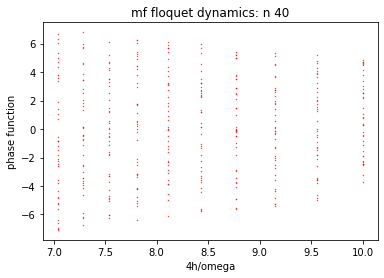

In [6]:


import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
import math
import time

N = 40
q = np.linspace(-0.5, 0.5, N)
h = 25.0
h0 = 0.1

omegas = np.linspace(10.0,14.2,10)
psi = np.eye(N) + (1j) * np.zeros((N,N))

cosp = np.zeros((N,N)) + (1j) * np.zeros((N,N))
cosp_init = np.zeros((N,N)) + (1j) * np.zeros((N,N))
floqEvoluion_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))

title = "mf floquet dynamics: n " + str(N)
hotoname = "n_" + str(N) + "_mfd_bessel3b.jpeg"
filename = "n_" + str(N) + "_mfd.txt"

class Periodic_Lattice(np.ndarray):
    def __new__(cls, input_array, lattice_spacing=None):
        obj = np.asarray(input_array).view(cls)
        obj.lattice_shape = input_array.shape
        obj.lattice_dim = len(input_array.shape)
        obj.lattice_spacing = lattice_spacing
        return obj
    
    def __getitem__(self, index):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__getitem__(index)
    
    def __setitem__(self, index, item):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__setitem__(index, item)
    
    def __array_finalize__(self, obj):
        if obj is None: return
        self.lattice_shape = getattr(obj, 'lattice_shape', obj.shape)
        self.lattice_dim = getattr(obj, 'lattice_dim', len(obj.shape))
        self.lattice_spacing = getattr(obj, 'lattice_spacing', None)
        pass
    
    def latticeWrapIdx(self, index):
        if not hasattr(index, '__iter__'): return index         # handle integer slices
        if len(index) != len(self.lattice_shape): return index  # must reference a scalar
        if any(type(i) == slice for i in index): return index   # slices not supported
        if len(index) == len(self.lattice_shape):               # periodic indexing of scalars
            mod_index = tuple(( (i%s + s)%s for i,s in zip(index, self.lattice_shape)))
            return mod_index
        raise ValueError('Unexpected index: {}'.format(index))


def floq_func(periodic_psi,t,h,h0,w,cosp):
    drive = h0 + h * np.cos(w * t)
    jac = (1j) * N * (-2.0 * q * q - drive * np.sqrt(1.0 - 4.0 * q *q) * cosp)
    return np.dot(jac, periodic_psi)

def floq_evolv(periodic_psi,h,h0,w,cosp):
    T = 2 * np.pi/w                                            # time periode
    t = np.linspace(0,2 * np.pi/w,N)                           # time range
    floqEvoluion_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))
    
    psi_t = np.array(list(map(lambda psi0: odeintw(floq_func,psi0,t,args=(h,h0,w,cosp)), periodic_psi)))
    floqEvolution_mat = psi_t[:,N-1]
    evals, evecs = eig(floqEvolution_mat)
    phasefunc = (1j * np.log(evals))/T
    return phasefunc
    
if __name__ == '__main__':
    nprocs = 2
    p = Pool(processes = nprocs)
    cosp_init = 0.0    
   
    periodic_psi  = Periodic_Lattice(psi)       
    cospinit = 0.0
      
    print("running for N = ", N, "with",nprocs,"processors")
    start = time.time()
    
    for k in np.arange(N):
        for m in np.arange(N):
            for l in np.arange(N+1):
                for j in np.arange(l+1):
                    cospinit = cospinit + np.array([pow((-1),(l+j))/math.factorial(2 * l)* \
                                          math.comb(l,j)* periodic_psi[(k+(l-j),(m))]])
            cosp[k,m] = cospinit
            cospinit = 0.0
            
    data = p.starmap(floq_evolv,[(periodic_psi,h,h0,w,cosp) for w in omegas])
    print("time taken", time.time()-start,"sec")
    
    for xx, omg in enumerate(omegas):
        #omega = [omg] * N
        omega = [4*h/omg] * N
        plt.scatter(omega, data[xx].real, color='red', marker='.', s= 0.5)
    plt.title(title)    
    plt.xlabel("4h/omega")
    plt.ylabel("phase function")
    #plt.savefig(photoname, dpi=500)
    plt.show()